In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from scipy.stats import wasserstein_distance

In [2]:
def compare_spectra(ml_spectra, true_spectra):
    x = np.linspace(280,300,200)
    
    plt.plot(x, true_spectra, color='blue', label='True Spectrum')
    
    plt.plot(x, ml_spectra, color='red', label='ML Spectrum')
    
    plt.xlabel('Photon Energy / eV')
    plt.xlim(280,300)
    plt.ylabel('Intensity / arb. units')
    plt.legend()
    
    plt.show()

In [109]:
file = open('spectra_results/spectra_ml_21.pkl', 'rb')
data = pkl.load(file)

In [110]:
predict = data[0]
true = data[1]

In [111]:
wasser = []
mse = []

for x in range(len(predict)):
    # Wasserstein metric
    wass_temp = wasserstein_distance(predict[x], true[x])
    wasser.append(wass_temp)
    # Mean squared error
    mse_temp = mean_squared_error(predict[x], true[x])
    mse.append(mse_temp)

print(f"Average Wasserstein distance = {sum(wasser) / len(wasser)}")
print(f"Average MSE = {sum(mse) / len(mse)}")

Average Wasserstein distance = 0.045884617520276144
Average MSE = 0.007575873446532815


Best wasserstein distance = 0.016469863915485702
Index of best spectral prediction: 33


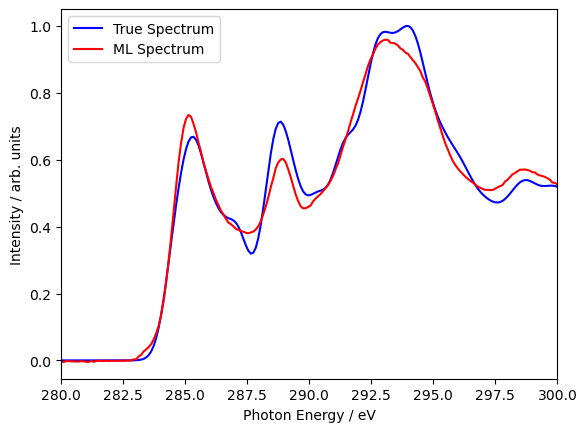

In [112]:
# Find best spectra prediction
val = min(wasser)
print(f"Best wasserstein distance = {val}")
idx = wasser.index(val)
print(f"Index of best spectral prediction: {idx}")

compare_spectra(predict[idx], true[idx])

Worst wasserstein distance = 0.0941517813627386
Index of best spectral prediction: 10


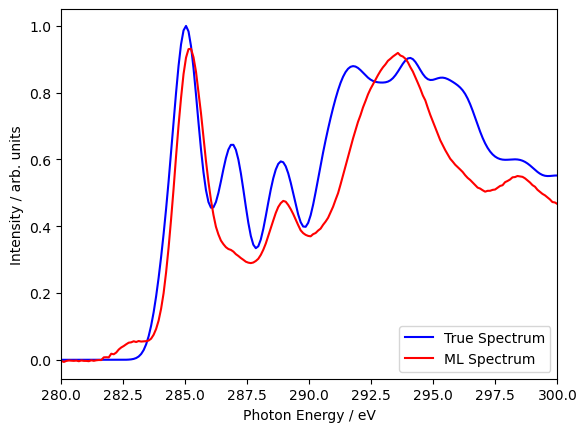

In [113]:
# Find worst spectra prediction
val = max(wasser)
print(f"Worst wasserstein distance = {val}")
idx = wasser.index(val)
print(f"Index of best spectral prediction: {idx}")

compare_spectra(predict[idx], true[idx])